In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
%matplotlib inline
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import tree
from scipy.stats import levene,shapiro,f_oneway
from sklearn.metrics import roc_curve,auc

In [47]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#importing ploting library 
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn import datasets 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats 
import seaborn as sns 
#import Linear Regression machine Learning Library 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.datasets import load_iris

In [4]:
df = pd.read_csv('parkinson.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [6]:
df.name.nunique

<bound method IndexOpsMixin.nunique of 0      phon_R01_S01_1
1      phon_R01_S01_2
2      phon_R01_S01_3
3      phon_R01_S01_4
4      phon_R01_S01_5
5      phon_R01_S01_6
6      phon_R01_S02_1
7      phon_R01_S02_2
8      phon_R01_S02_3
9      phon_R01_S02_4
10     phon_R01_S02_5
11     phon_R01_S02_6
12     phon_R01_S04_1
13     phon_R01_S04_2
14     phon_R01_S04_3
15     phon_R01_S04_4
16     phon_R01_S04_5
17     phon_R01_S04_6
18     phon_R01_S05_1
19     phon_R01_S05_2
20     phon_R01_S05_3
21     phon_R01_S05_4
22     phon_R01_S05_5
23     phon_R01_S05_6
24     phon_R01_S06_1
25     phon_R01_S06_2
26     phon_R01_S06_3
27     phon_R01_S06_4
28     phon_R01_S06_5
29     phon_R01_S06_6
            ...      
165    phon_R01_S42_1
166    phon_R01_S42_2
167    phon_R01_S42_3
168    phon_R01_S42_4
169    phon_R01_S42_5
170    phon_R01_S42_6
171    phon_R01_S43_1
172    phon_R01_S43_2
173    phon_R01_S43_3
174    phon_R01_S43_4
175    phon_R01_S43_5
176    phon_R01_S43_6
177    phon_R01

In [7]:
X= df[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']]
y= df['status']

In [8]:
x_train, x_test, y_train,y_test = train_test_split(X,y, random_state = 1, test_size = 0.3)

In [9]:
gr= df.groupby(df['status'])

In [10]:
gr1= gr.get_group(0) 
gr2= gr.get_group(1)

In [11]:
f,p= f_oneway(gr1['MDVP:Fo(Hz)'],gr2['MDVP:Fo(Hz)'])
p

3.121919402836332e-08

In [12]:
f,p= f_oneway(gr1['MDVP:Fhi(Hz)'],gr2['MDVP:Fhi(Hz)'])
p

0.020275669142798408

In [13]:
f,p= f_oneway(gr1['MDVP:Flo(Hz)'],gr2['MDVP:Flo(Hz)'])
p

4.1970041821535477e-08

In [14]:
f,p= f_oneway(gr1['MDVP:Jitter(%)'],gr2['MDVP:Jitter(%)'])
p

8.209989250843925e-05

In [15]:
f,p= f_oneway(gr1['MDVP:Jitter(Abs)'],gr2['MDVP:Jitter(Abs)'])
p

1.2822523240682387e-06

In [16]:
f,p= f_oneway(gr1['MDVP:RAP'],gr2['MDVP:RAP'])
p

0.0001643393410195311

In [17]:
f,p= f_oneway(gr1['MDVP:PPQ'],gr2['MDVP:PPQ'])
p

4.257766523261872e-05

In [18]:
f,p= f_oneway(gr1['Jitter:DDP'],gr2['Jitter:DDP'])
p

0.00016454664474031298

In [19]:
f,p= f_oneway(gr1['MDVP:Shimmer'],gr2['MDVP:Shimmer'])
p

1.2647022896752661e-07

In [20]:
f,p= f_oneway(gr1['MDVP:Shimmer(dB)'],gr2['MDVP:Shimmer(dB)'])
p

5.000743178590638e-07

In [21]:
f,p= f_oneway(gr1['Shimmer:APQ3'],gr2['Shimmer:APQ3'])
p

6.386194089451467e-07

In [22]:
f,p= f_oneway(gr1['Shimmer:APQ5'],gr2['Shimmer:APQ5'])
p

4.82357514488572e-07

In [23]:
f,p= f_oneway(gr1['MDVP:APQ'],gr2['MDVP:APQ'])
p

1.6432377654660142e-07

In [24]:
f,p= f_oneway(gr1['Shimmer:DDA'],gr2['Shimmer:DDA'])
p

6.390538560329779e-07

In [25]:
f,p= f_oneway(gr1['NHR'],gr2['NHR'])
p

0.007994850518899843

In [26]:
f,p= f_oneway(gr1['HNR'],gr2['HNR'])
p

2.074677359679702e-07

In [27]:
f,p= f_oneway(gr1['RPDE'],gr2['RPDE'])
p

1.1398962455333769e-05

In [28]:
f,p= f_oneway(gr1['DFA'],gr2['DFA'])
p

0.001115115879842905

In [29]:
f,p= f_oneway(gr1['DFA'],gr2['DFA'])
p

0.001115115879842905

In [30]:
f,p= f_oneway(gr1['spread1'],gr2['spread1'])
p

7.909650873104612e-18

In [31]:
f,p= f_oneway(gr1['spread2'],gr2['spread2'])
p

2.3917287623712665e-11

In [32]:
f,p= f_oneway(gr1['D2'],gr2['D2'])
p

1.1359246053142801e-06

In [33]:
f,p= f_oneway(gr1['PPE'],gr2['PPE'])
p

1.3926186153164145e-15

In [34]:
df2= df.drop(columns = 'status',axis =1)
df2= df.drop(columns = 'name',axis =1)

In [35]:
df2.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [36]:
df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [37]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [26]:
# we have performed the anaova test because one vraible is continous and other is categorical

In [72]:
# we will inculde all those variable in our modeling for which the p value is less then 0.05 

In [73]:
# here we see that every variable is having p val less then 0.05 hence to a certain extent each variable is contributing

In [38]:
# fitting the model
m1 = LogisticRegression()
m1.fit(x_train,y_train)
y_pre = m1.predict(x_test)
y_pre
#m1.score(X,y)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [39]:
sum(y_pre == y_test)

48

In [40]:
cm3= metrics.confusion_matrix(y_test,y_pre)
print(cm3)

[[10  9]
 [ 2 38]]


In [41]:
pd.crosstab(y_test,y_pre)

col_0,0,1
status,,
0,10,9
1,2,38


In [42]:
acc=metrics.accuracy_score(y_test,y_pre)
print(acc*100)

81.35593220338984


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pre))

             precision    recall  f1-score   support

          0       0.83      0.53      0.65        19
          1       0.81      0.95      0.87        40

avg / total       0.82      0.81      0.80        59



In [44]:
fpr,tpr,_ = roc_curve(y_test,y_pre)
fpr,tpr,_

(array([0.        , 0.47368421, 1.        ]),
 array([0.  , 0.95, 1.  ]),
 array([2, 1, 0], dtype=int64))

In [45]:
# here our true postive rate that  is recall or sesnitivity  is 95% and our main aim is focussed on recall because detcting the pd 
# is more important . If a person is having disease and if it is not detected then it is more harmful. and if a person is not having disaese
#and it is detected as disease then it is less harmful since he might go some other clinic for checkup or there is possibility that 
# beacause of certain features and obseravtions it is possible that in near future he needs to take some kind of treatment beacuse prevention is better then cure

0.7381578947368421


<Figure size 432x288 with 0 Axes>

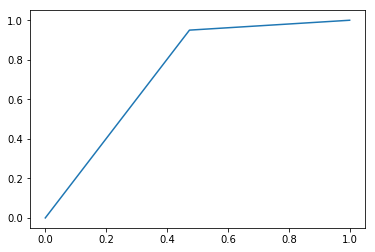

<Figure size 432x288 with 0 Axes>

In [46]:
roc_auc= auc(fpr,tpr)
plt.plot(fpr,tpr)
print(roc_auc)
plt.figure()
#plt.xlim([0.0,0.1])
#plt.ylim([0.0,0.1])

In [1]:
# since the model is having roc value of 0.73 hence it falls under the category of good

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
m_1=DecisionTreeClassifier()

In [83]:
data_tree=m_1.fit(x_train,y_train)

In [84]:
y_predict=m_1.predict(x_test)

In [85]:
rmse1=np.sqrt(np.sum((y_test-y_predict)**2)/len(y_test))

In [86]:
mse=(np.sum((y_test-y_predict)**2)/len(y_test))

In [87]:
mse

0.1016949152542373

In [88]:
rmse1

0.31889640207164033

In [89]:
data_tree.score(x_test,y_test)

0.8983050847457628

In [100]:
from sklearn.ensemble import BaggingClassifier

In [101]:
bagg= BaggingClassifier(n_estimators=5,bootstrap=True,oob_score=True)

In [102]:
dt_bagg=bagg.fit(x_train,y_train)

C:\Users\AKSHAY\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\AKSHAY\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


In [103]:
pred_bagg_dt=bagg.predict(x_test)

In [104]:
rmse_dt_bagg=np.sqrt(np.sum((y_test-pred_bagg_dt)**2)/len(y_test))

In [105]:
rmse_dt_bagg

0.4317877695883728

In [106]:
mse_dt_bagg=(np.sum((y_test-pred_bagg_dt)**2)/len(y_test))

In [107]:
mse

0.1016949152542373

In [108]:
dt_bagg.score(x_test,y_test)

0.8135593220338984

In [67]:
#implementing RandomForestRegressor

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf =RandomForestClassifier()

In [76]:
data_rf=rf.fit(x_train,y_train)

In [77]:
y_predict3=rf.predict(x_test)

In [78]:
rmse3=np.sqrt(np.sum((y_test-y_predict3)**2)/len(y_test))

In [79]:
rmse3

0.46940279403817725

In [80]:
data_rf.score(x_test,y_test)

0.7796610169491526

In [99]:
from sklearn.ensemble import BaggingClassifier

In [109]:
bagg= BaggingClassifier(n_estimators=5,bootstrap=True,oob_score=True)

In [110]:
rf_bagg=bagg.fit(x_train,y_train)

C:\Users\AKSHAY\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\AKSHAY\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


In [111]:
pred_bagg_rf=bagg.predict(x_test)

In [112]:
rmse_rf_bagg=np.sqrt(np.sum((y_test-pred_bagg_rf)**2)/len(y_test))

In [113]:
rmse_rf_bagg

0.34444748191358604

In [114]:
mse=(np.sum((y_test-pred_bagg_rf)**2)/len(y_test))
mse

0.11864406779661017

In [115]:
rf_bagg.score(x_test,y_test)

0.8813559322033898

# So,best model for this problem is RandomforestClassifier